In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train=True,
    transform=ToTensor(),
    download=True
)

test_data = datasets.MNIST(
    root = 'data',
    train=False,
    transform=ToTensor(),
    download=True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:05<00:00, 1672264.03it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 202475.28it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1072926.88it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_data.data.shape # 60k , 28x28 pixels , only grayscale channels

torch.Size([60000, 28, 28])

In [9]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [10]:
train_data.targets.shape # 60k images

torch.Size([60000])

In [11]:
train_data.targets # classes

tensor([5, 0, 4,  ..., 5, 6, 8])

In [14]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                         batch_size=100,
                         shuffle=True),
    
    'test' : DataLoader(test_data,
                         batch_size=100,
                         shuffle=True)
}

In [15]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x24ff1e46310>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x24ff2debd50>}

In [16]:
# Model Building
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

class CNN(nn.Module):
    # Deafults things
    def __init__(self):
        super(CNN,self).__init__() # this classes the constructer of the parent class
        
        # Defining The CNN
        self.conv1 = nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50) # dense layer
        self.fc2 = nn.Linear(50,10) # last layer must have 10 because 10 classes
    
    # Acitvation Foward passing
    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x,training=self.training)
        x = self.fc2(x)
        
        return F.softmax(x)
        

In [19]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer =optim.Adam(model.parameters(),lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx , (data,target) in enumerate(loaders['train']):
        data,target = data.to(device), target.to(device)
        optimizer.zero_grad() # before each batch we zero the grad of previous batch
        output = model(data)
        loss = loss_fn(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0 :
             print(f"Train Epoch : {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0f}%)\t{loss.item():.6f}]")


In [20]:
def test():
    model.eval()
    
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    test_loss /= len(loaders['test'].dataset)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders['test'].dataset)} ({100. * correct / len(loaders['test'].dataset):.0f}%)\n")


In [22]:
for epoch in range(1,5):
    train(epoch)
    test()

C:\Users\mustafa\AppData\Local\Temp\ipykernel_4436\929522570.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch : 1 [0/60000 (0%)	1.546579]
Train Epoch : 1 [2000/60000 (3%)	1.552494]
Train Epoch : 1 [4000/60000 (7%)	1.579642]
Train Epoch : 1 [6000/60000 (10%)	1.574430]
Train Epoch : 1 [8000/60000 (13%)	1.550306]
Train Epoch : 1 [10000/60000 (17%)	1.561952]
Train Epoch : 1 [12000/60000 (20%)	1.634714]
Train Epoch : 1 [14000/60000 (23%)	1.609441]
Train Epoch : 1 [16000/60000 (27%)	1.598141]
Train Epoch : 1 [18000/60000 (30%)	1.580274]
Train Epoch : 1 [20000/60000 (33%)	1.593119]
Train Epoch : 1 [22000/60000 (37%)	1.543151]
Train Epoch : 1 [24000/60000 (40%)	1.579419]
Train Epoch : 1 [26000/60000 (43%)	1.600644]
Train Epoch : 1 [28000/60000 (47%)	1.578398]
Train Epoch : 1 [30000/60000 (50%)	1.591445]
Train Epoch : 1 [32000/60000 (53%)	1.550393]
Train Epoch : 1 [34000/60000 (57%)	1.538022]
Train Epoch : 1 [36000/60000 (60%)	1.579622]
Train Epoch : 1 [38000/60000 (63%)	1.544626]
Train Epoch : 1 [40000/60000 (67%)	1.567200]
Train Epoch : 1 [42000/60000 (70%)	1.562359]
Train Epoch : 1 [4400

Prediction: 0


C:\Users\mustafa\AppData\Local\Temp\ipykernel_4436\929522570.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


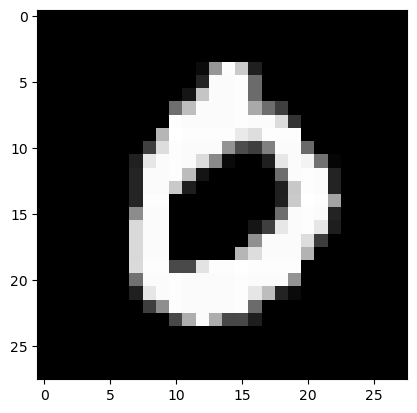

In [28]:
import matplotlib.pyplot as plt

model.eval()

data,target = test_data[3]
data = data.unsqueeze(0).to(device)


output = model(data)
prediction = output.argmax(dim=1,keepdim=True).item()

print(f"Prediction: {prediction}")

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image,cmap='gray')
plt.show()